<a href="https://colab.research.google.com/github/hy2632/SystematicTrading/blob/main/SP500_sigma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
# import pandas_datareader as pdr
from pandas_datareader import data
import matplotlib.pyplot as plt
import pdb
from tqdm.notebook import tqdm
%cd drive/MyDrive/SystematicTrading/

/content/drive/MyDrive/SystematicTrading


"Equities usually have an annualized standard deviation of 20% "

In [2]:
def get_stddev(symbol="AAPL", start_date="20190101", end_date="20200101"):
    df = data.get_data_yahoo(symbol, start_date, end_date)
    return np.std(df["Adj Close"].shift(1) / df["Adj Close"] - 1) * np.sqrt(256)

In [3]:
for stock in ["AAPL", "AMD", "NVDA", "GM", "DD"]:
    print(get_stddev(stock))

0.26706148982619365
0.5208233793165514
0.4137055703177332
0.24624559545169006
0.3365610580459151


In [4]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

first_table = payload[0]
second_table = payload[1]

df = first_table

In [5]:
symbols = df.Symbol.to_list()
stds = []
for stock in tqdm(symbols):
    try:
        std = get_stddev(stock)
        stds.append((stock, std))
    except:
        continue
    
    

In [17]:
df_std = pd.DataFrame(stds, columns=["Symbol", "Annualized_STD"])

In [18]:
df_std.to_csv("SP500_std.csv", index_label=False)

In [19]:
df_std = pd.read_csv("SP500_std.csv", )

In [20]:
df_std

,Symbol,Annualized_STD
0,MMM,0.262415
1,ABT,0.197357
2,ABBV,0.293759
3,ABMD,0.580944
4,ACN,0.169762
...,...,...
494,YUM,0.157427
495,ZBRA,0.379222
496,ZBH,0.216758
497,ZION,0.254118


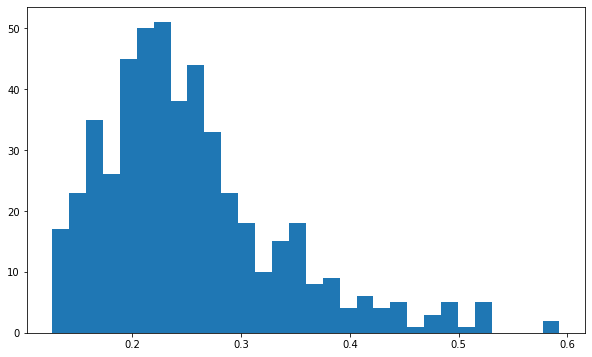

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df_std.Annualized_STD, bins=30)
plt.show()

In [12]:
df_std.Annualized_STD.median(),df_std.Annualized_STD.mean()

(0.23683583565470004, 0.2539848363069482)

"2-year bond has an annualized sigma of 1.5% while a 10-year bond is more like 8%."

In [14]:
get_stddev("^TNX", "20160101", "20170101")

0.3932939185481707